<a href="https://colab.research.google.com/github/virtualspark/YCNG232-NLP_Fundamentals/blob/main/Reflexion_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
#install.packages("janeaustenr")
#install.packages("tidytext")
#install.packages("widyr")
#install.packages("textdata")

NULL


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%%R
library(dplyr)
library(janeaustenr)
library(tidytext)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




In [5]:
%%R
books <- austen_books()
head(books)

# A tibble: 6 × 2
  text                    book               
  <chr>                   <fct>              
1 "SENSE AND SENSIBILITY" Sense & Sensibility
2 ""                      Sense & Sensibility
3 "by Jane Austen"        Sense & Sensibility
4 ""                      Sense & Sensibility
5 "(1811)"                Sense & Sensibility
6 ""                      Sense & Sensibility


In [6]:
%%R
book_words <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE)

total_words <- book_words %>% group_by(book) %>% summarize(total = sum(n))
book_words <- left_join(book_words, total_words)
book_words

Joining, by = "book"
# A tibble: 40,379 × 4
   book              word      n  total
   <fct>             <chr> <int>  <int>
 1 Mansfield Park    the    6206 160460
 2 Mansfield Park    to     5475 160460
 3 Mansfield Park    and    5438 160460
 4 Emma              to     5239 160996
 5 Emma              the    5201 160996
 6 Emma              and    4896 160996
 7 Mansfield Park    of     4778 160460
 8 Pride & Prejudice the    4331 122204
 9 Emma              of     4291 160996
10 Pride & Prejudice to     4162 122204
# … with 40,369 more rows
# ℹ Use `print(n = ...)` to see more rows


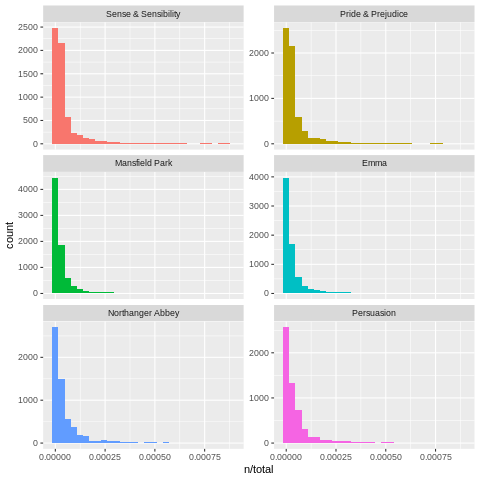

In [7]:
%%R
library(ggplot2)
ggplot(book_words, aes(n/total, fill = book)) +
  geom_histogram(show.legend = FALSE) +
  xlim(NA, 0.0009) +
  facet_wrap(~book, ncol = 2, scales = "free_y")

In [8]:
%%R
book_words <- book_words %>%
  bind_tf_idf(word, book, n)
book_words

# A tibble: 40,379 × 7
   book              word      n  total     tf   idf tf_idf
   <fct>             <chr> <int>  <int>  <dbl> <dbl>  <dbl>
 1 Mansfield Park    the    6206 160460 0.0387     0      0
 2 Mansfield Park    to     5475 160460 0.0341     0      0
 3 Mansfield Park    and    5438 160460 0.0339     0      0
 4 Emma              to     5239 160996 0.0325     0      0
 5 Emma              the    5201 160996 0.0323     0      0
 6 Emma              and    4896 160996 0.0304     0      0
 7 Mansfield Park    of     4778 160460 0.0298     0      0
 8 Pride & Prejudice the    4331 122204 0.0354     0      0
 9 Emma              of     4291 160996 0.0267     0      0
10 Pride & Prejudice to     4162 122204 0.0341     0      0
# … with 40,369 more rows
# ℹ Use `print(n = ...)` to see more rows


In [9]:
%%R
library(tidyverse)
book_words %>% filter(str_detect(word, "^play"))


✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2

✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# A tibble: 42 × 7
   book              word        n  total        tf   idf tf_idf
   <fct>             <chr>   <int>  <int>     <dbl> <dbl>  <dbl>
 1 Mansfield Park    play       70 160460 0.000436      0      0
 2 Pride & Prejudice play       18 122204 0.000147      0      0
 3 Emma              play       18 160996 0.000112      0      0
 4 Persuasion        play       13  83658 0.000155      0      0
 5 Emma              playing    10 160996 0.0000621     0      0
 6 Northanger Abbey  play        9  77780 0.000116      0      0
 7 Mansfield Park    played      8 160460 0.0000499     0      0
 8 Emma              played      8 160996 0.0000497     0      0
 9 Pride & Prejudice playing     6 122204 0.0000491     0      0
10 Mansfield Park    playing     6 160460 0.0000374     0      0
# … with 32 more rows
# ℹ Use `print(n = ...)` to see more rows


In [10]:
%%R
book_words %>%
  select(-total) %>%
  arrange(desc(tf_idf))

# A tibble: 40,379 × 6
   book                word          n      tf   idf  tf_idf
   <fct>               <chr>     <int>   <dbl> <dbl>   <dbl>
 1 Sense & Sensibility elinor      623 0.00519  1.79 0.00931
 2 Sense & Sensibility marianne    492 0.00410  1.79 0.00735
 3 Mansfield Park      crawford    493 0.00307  1.79 0.00551
 4 Pride & Prejudice   darcy       373 0.00305  1.79 0.00547
 5 Persuasion          elliot      254 0.00304  1.79 0.00544
 6 Emma                emma        786 0.00488  1.10 0.00536
 7 Northanger Abbey    tilney      196 0.00252  1.79 0.00452
 8 Emma                weston      389 0.00242  1.79 0.00433
 9 Pride & Prejudice   bennet      294 0.00241  1.79 0.00431
10 Persuasion          wentworth   191 0.00228  1.79 0.00409
# … with 40,369 more rows
# ℹ Use `print(n = ...)` to see more rows


In [11]:
#%%R
#book_words %>%
#  filter(book == "Pride & Prejudice") %>%
#  select(-total) %>%
#  arrange(desc(tf_idf))

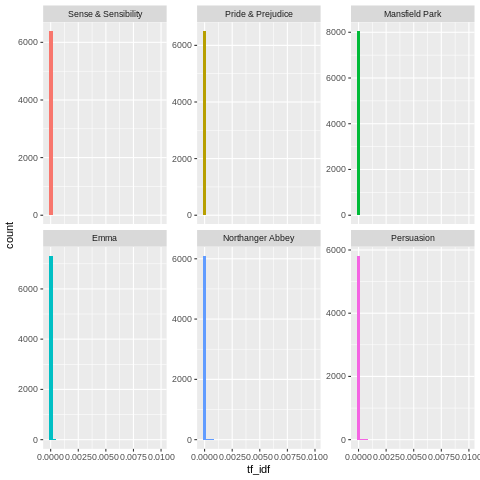

In [12]:
%%R
library(ggplot2)
library(repr)
options(repr.plot.width = 20, repr.plot.height = 4)
ggplot(book_words, aes(tf_idf, fill = book)) + geom_histogram(show.legend = FALSE) + xlim(NA, 0.01) + facet_wrap(~book, ncol = 3, scales = "free_y")

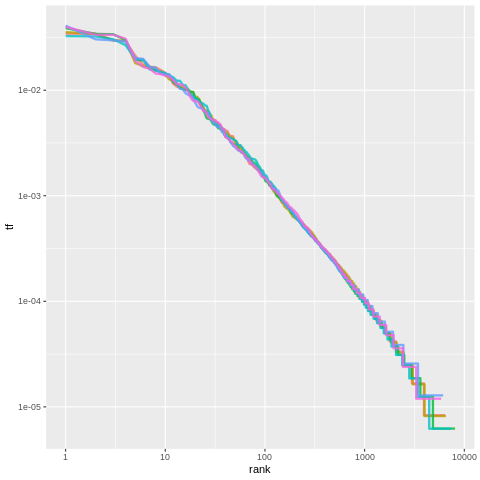

In [13]:
%%R
# this means they make sort of a straight line in a log-log plot (with noise at the start and at the end)
fr <- book_words %>% group_by(book) %>% mutate(rank = row_number(), `tf` = tf) # rank the tf-idf
fr %>% ggplot(aes(rank, `tf`, color = book)) + geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + scale_x_log10() + scale_y_log10()

replace the existing scale.



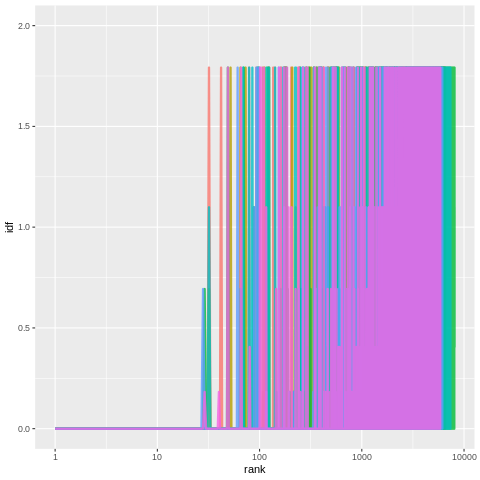

In [14]:
%%R
# this means they make sort of a straight line in a log-log plot (with noise at the start and at the end)
fr <- book_words %>% group_by(book) %>% mutate(rank = row_number(), `idf` = idf) # rank the tf-idf
fr %>% ggplot(aes(rank, `idf`, color = book)) + geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + scale_x_log10() + scale_y_log10() + ylim(NA, 2)

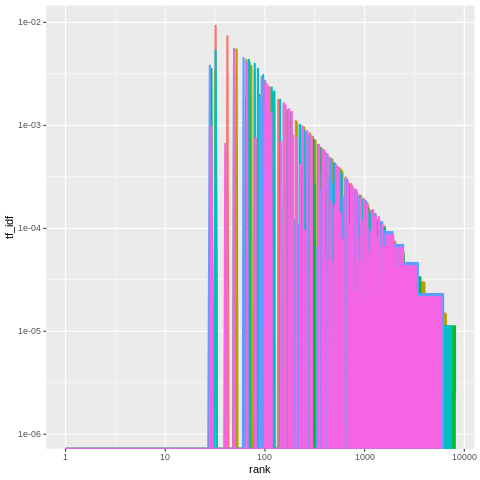

In [15]:
%%R
# this means they make sort of a straight line in a log-log plot (with noise at the start and at the end)
fr <- book_words %>% group_by(book) %>% mutate(rank = row_number(), `tf_idf` = tf_idf) # rank the tf-idf
fr %>% ggplot(aes(rank, `tf_idf`, color = book)) + geom_line(size = 1, alpha = 1, show.legend = FALSE) + scale_x_log10() + scale_y_log10()

In [16]:
%%R
book_words

# A tibble: 40,379 × 7
   book              word      n  total     tf   idf tf_idf
   <fct>             <chr> <int>  <int>  <dbl> <dbl>  <dbl>
 1 Mansfield Park    the    6206 160460 0.0387     0      0
 2 Mansfield Park    to     5475 160460 0.0341     0      0
 3 Mansfield Park    and    5438 160460 0.0339     0      0
 4 Emma              to     5239 160996 0.0325     0      0
 5 Emma              the    5201 160996 0.0323     0      0
 6 Emma              and    4896 160996 0.0304     0      0
 7 Mansfield Park    of     4778 160460 0.0298     0      0
 8 Pride & Prejudice the    4331 122204 0.0354     0      0
 9 Emma              of     4291 160996 0.0267     0      0
10 Pride & Prejudice to     4162 122204 0.0341     0      0
# … with 40,369 more rows
# ℹ Use `print(n = ...)` to see more rows


In [17]:
%%R
# closest books to each other
library(widyr)
closest_documents <- book_words %>%
  pairwise_similarity(book, word, n) %>%
  arrange(desc(similarity))

In [18]:
%%R
closest_documents

# A tibble: 30 × 3
   item1               item2               similarity
   <fct>               <fct>                    <dbl>
 1 Sense & Sensibility Pride & Prejudice        0.986
 2 Pride & Prejudice   Sense & Sensibility      0.986
 3 Persuasion          Mansfield Park           0.986
 4 Mansfield Park      Persuasion               0.986
 5 Northanger Abbey    Mansfield Park           0.986
 6 Mansfield Park      Northanger Abbey         0.986
 7 Pride & Prejudice   Mansfield Park           0.985
 8 Mansfield Park      Pride & Prejudice        0.985
 9 Sense & Sensibility Mansfield Park           0.985
10 Mansfield Park      Sense & Sensibility      0.985
# … with 20 more rows
# ℹ Use `print(n = ...)` to see more rows


In [19]:
# With Stemming

In [20]:
%%R
book_words <- austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort = TRUE)

#total_words <- book_words %>% group_by(book) %>% summarize(total = sum(n))
#book_words <- left_join(book_words, total_words)
book_words

# A tibble: 40,379 × 3
   book              word      n
   <fct>             <chr> <int>
 1 Mansfield Park    the    6206
 2 Mansfield Park    to     5475
 3 Mansfield Park    and    5438
 4 Emma              to     5239
 5 Emma              the    5201
 6 Emma              and    4896
 7 Mansfield Park    of     4778
 8 Pride & Prejudice the    4331
 9 Emma              of     4291
10 Pride & Prejudice to     4162
# … with 40,369 more rows
# ℹ Use `print(n = ...)` to see more rows


In [21]:
#%%R
#book_words %>% count(word, sort = TRUE) %>% filter(str_detect(word, "^play"))

In [22]:
%%R
library(SnowballC)

stem_words <- book_words %>% group_by(book) %>% mutate(stem = wordStem(word)) %>%
  count(stem, sort = TRUE)
stem_words

# A tibble: 26,629 × 3
# Groups:   book [6]
   book                stem        n
   <fct>               <chr>   <int>
 1 Mansfield Park      admir      10
 2 Sense & Sensibility respect     9
 3 Mansfield Park      observ      9
 4 Emma                observ      9
 5 Emma                respect     9
 6 Sense & Sensibility observ      8
 7 Pride & Prejudice   respect     8
 8 Mansfield Park      confid      8
 9 Mansfield Park      respect     8
10 Emma                admir       8
# … with 26,619 more rows
# ℹ Use `print(n = ...)` to see more rows


In [23]:
%%R
total_stemwords <- stem_words %>% group_by(book) %>% summarize(total = sum(n))
stem_words <- left_join(stem_words, total_stemwords)
stem_words

Joining, by = "book"
# A tibble: 26,629 × 4
# Groups:   book [6]
   book                stem        n total
   <fct>               <chr>   <int> <int>
 1 Mansfield Park      admir      10  8076
 2 Sense & Sensibility respect     9  6419
 3 Mansfield Park      observ      9  8076
 4 Emma                observ      9  7356
 5 Emma                respect     9  7356
 6 Sense & Sensibility observ      8  6419
 7 Pride & Prejudice   respect     8  6538
 8 Mansfield Park      confid      8  8076
 9 Mansfield Park      respect     8  8076
10 Emma                admir       8  7356
# … with 26,619 more rows
# ℹ Use `print(n = ...)` to see more rows


In [24]:
%%R
stem_words <- stem_words %>%
  bind_tf_idf(stem, book, n)
stem_words

# A tibble: 26,629 × 7
# Groups:   book [6]
   book                stem        n total       tf   idf tf_idf
   <fct>               <chr>   <int> <int>    <dbl> <dbl>  <dbl>
 1 Mansfield Park      admir      10  8076 0.00124      0      0
 2 Sense & Sensibility respect     9  6419 0.00140      0      0
 3 Mansfield Park      observ      9  8076 0.00111      0      0
 4 Emma                observ      9  7356 0.00122      0      0
 5 Emma                respect     9  7356 0.00122      0      0
 6 Sense & Sensibility observ      8  6419 0.00125      0      0
 7 Pride & Prejudice   respect     8  6538 0.00122      0      0
 8 Mansfield Park      confid      8  8076 0.000991     0      0
 9 Mansfield Park      respect     8  8076 0.000991     0      0
10 Emma                admir       8  7356 0.00109      0      0
# … with 26,619 more rows
# ℹ Use `print(n = ...)` to see more rows


In [25]:
%%R
stem_words %>% filter(str_detect(stem, "^play"))

# A tibble: 15 × 7
# Groups:   book [6]
   book                stem           n total       tf   idf    tf_idf
   <fct>               <chr>      <int> <int>    <dbl> <dbl>     <dbl>
 1 Sense & Sensibility play           2  6419 0.000312 0     0        
 2 Pride & Prejudice   play           2  6538 0.000306 0     0        
 3 Mansfield Park      play           2  8076 0.000248 0     0        
 4 Emma                play           2  7356 0.000272 0     0        
 5 Emma                player         2  7356 0.000272 0.182 0.0000496
 6 Sense & Sensibility playfellow     1  6419 0.000156 1.10  0.000171 
 7 Sense & Sensibility playth         1  6419 0.000156 1.79  0.000279 
 8 Pride & Prejudice   player         1  6538 0.000153 0.182 0.0000279
 9 Mansfield Park      player         1  8076 0.000124 0.182 0.0000226
10 Mansfield Park      playfellow     1  8076 0.000124 1.10  0.000136 
11 Emma                playfulli      1  7356 0.000136 1.79  0.000244 
12 Northanger Abbey    play          

In [26]:
%%R
stem_words %>%
  select(-total) %>%
  arrange(desc(tf_idf))

# A tibble: 26,629 × 6
# Groups:   book [6]
   book                stem         n       tf   idf   tf_idf
   <fct>               <chr>    <int>    <dbl> <dbl>    <dbl>
 1 Mansfield Park      rehears      6 0.000743  1.79 0.00133 
 2 Northanger Abbey    murder       4 0.000652  1.79 0.00117 
 3 Sense & Sensibility endeavor     3 0.000467  1.79 0.000837
 4 Sense & Sensibility honor        3 0.000467  1.79 0.000837
 5 Pride & Prejudice   entail       3 0.000459  1.79 0.000822
 6 Emma                bake         3 0.000408  1.79 0.000731
 7 Emma                cox          3 0.000408  1.79 0.000731
 8 Emma                surpriz      3 0.000408  1.79 0.000731
 9 Northanger Abbey    expir        4 0.000652  1.10 0.000717
10 Mansfield Park      rustic       3 0.000371  1.79 0.000666
# … with 26,619 more rows
# ℹ Use `print(n = ...)` to see more rows


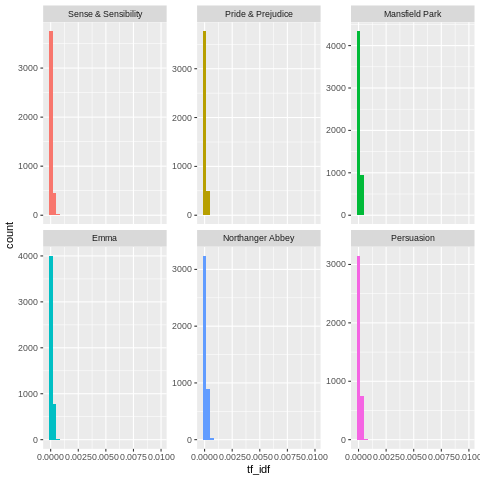

In [27]:
%%R
library(ggplot2)
library(repr)
options(repr.plot.width = 20, repr.plot.height = 4)
ggplot(stem_words, aes(tf_idf, fill = book)) + geom_histogram(show.legend = FALSE) + xlim(NA, 0.01) + facet_wrap(~book, ncol = 3, scales = "free_y")

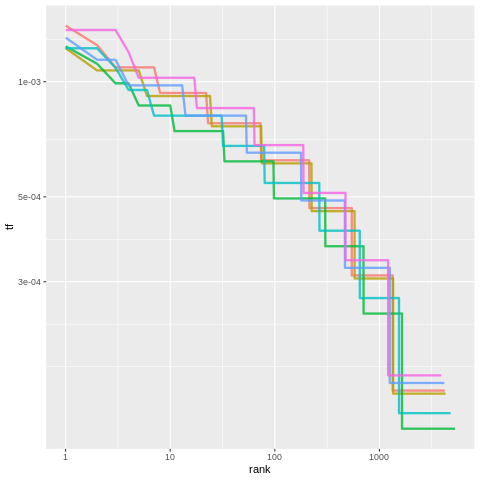

In [28]:
%%R
# this means they make sort of a straight line in a log-log plot (with noise at the start and at the end)
fr <- stem_words %>% group_by(book) %>% mutate(rank = row_number(), `tf` = tf) # rank the tf-idf
fr %>% ggplot(aes(rank, `tf`, color = book)) + geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + scale_x_log10() + scale_y_log10()

replace the existing scale.



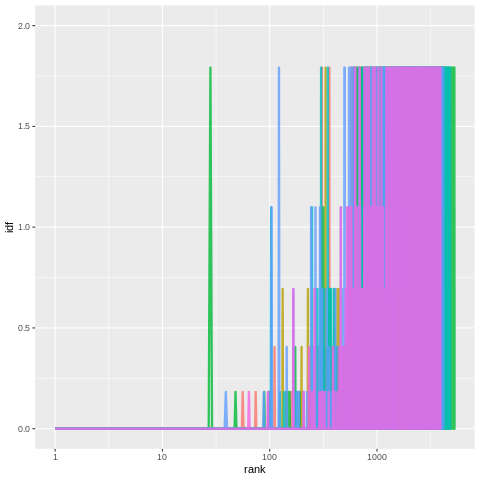

In [29]:
%%R
# this means they make sort of a straight line in a log-log plot (with noise at the start and at the end)
fr <- stem_words %>% group_by(book) %>% mutate(rank = row_number(), `idf` = idf) # rank the tf-idf
fr %>% ggplot(aes(rank, `idf`, color = book)) + geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) + scale_x_log10() + scale_y_log10() + ylim(NA, 2)

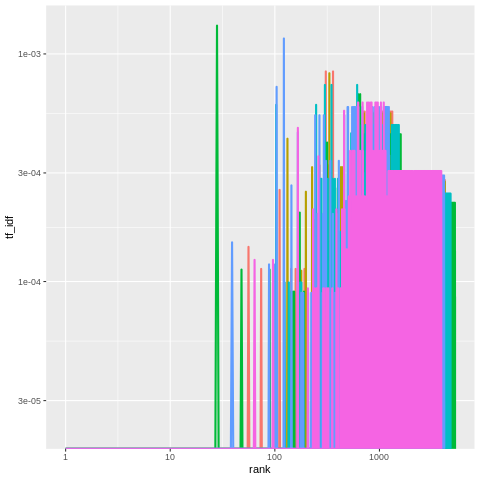

In [30]:
%%R
# this means they make sort of a straight line in a log-log plot (with noise at the start and at the end)
fr <- stem_words %>% group_by(book) %>% mutate(rank = row_number(), `tf_idf` = tf_idf) # rank the tf-idf
fr %>% ggplot(aes(rank, `tf_idf`, color = book)) + geom_line(size = 1, alpha = 1, show.legend = FALSE) + scale_x_log10() + scale_y_log10()

In [31]:
%%R
# closest books to each other
closest_documents_stem <- ungroup(stem_words) %>%
  pairwise_similarity(book, stem, n) %>%
  arrange(desc(similarity))
closest_documents_stem

# A tibble: 30 × 3
   item1               item2               similarity
   <fct>               <fct>                    <dbl>
 1 Emma                Mansfield Park           0.832
 2 Mansfield Park      Emma                     0.832
 3 Pride & Prejudice   Sense & Sensibility      0.830
 4 Sense & Sensibility Pride & Prejudice        0.830
 5 Sense & Sensibility Mansfield Park           0.817
 6 Mansfield Park      Sense & Sensibility      0.817
 7 Emma                Sense & Sensibility      0.816
 8 Sense & Sensibility Emma                     0.816
 9 Pride & Prejudice   Emma                     0.814
10 Emma                Pride & Prejudice        0.814
# … with 20 more rows
# ℹ Use `print(n = ...)` to see more rows


In [ ]:
# Test on taggers

In [32]:
%%R
s1 <- get_sentiments("nrc")

In [33]:
%%R
s1_stem <- s1 %>% mutate(stem = wordStem(word))

In [34]:
%%R
s1_stem %>% filter(str_detect(stem, "^play"))

# A tibble: 13 × 3
   word       sentiment    stem      
   <chr>      <chr>        <chr>     
 1 player     negative     player    
 2 playful    anger        play      
 3 playful    joy          play      
 4 playful    positive     play      
 5 playful    surprise     play      
 6 playful    trust        play      
 7 playground anticipation playground
 8 playground joy          playground
 9 playground positive     playground
10 playground surprise     playground
11 playground trust        playground
12 playhouse  joy          playhous  
13 playhouse  positive     playhous  


In [35]:
%%R
s1_stem %>%
  count(stem, sort = TRUE)

# A tibble: 5,350 × 2
   stem        n
   <chr>   <int>
 1 excit      26
 2 celebr     19
 3 murder     17
 4 poison     17
 5 punish     16
 6 bless      15
 7 devast     15
 8 oppress    15
 9 cheer      14
10 depress    14
# … with 5,340 more rows
# ℹ Use `print(n = ...)` to see more rows


In [36]:
%%R
s3 <- get_sentiments("bing")

In [37]:
%%R
s3

# A tibble: 6,786 × 2
   word        sentiment
   <chr>       <chr>    
 1 2-faces     negative 
 2 abnormal    negative 
 3 abolish     negative 
 4 abominable  negative 
 5 abominably  negative 
 6 abominate   negative 
 7 abomination negative 
 8 abort       negative 
 9 aborted     negative 
10 aborts      negative 
# … with 6,776 more rows
# ℹ Use `print(n = ...)` to see more rows


In [38]:
%%R
s3_stem <- s3 %>% mutate(stem = wordStem(word))

In [39]:
%%R
s3_stem %>% filter(str_detect(stem, "^play"))

# A tibble: 3 × 3
  word      sentiment stem     
  <chr>     <chr>     <chr>    
1 playful   positive  play     
2 playfully positive  playfulli
3 plaything negative  playth   
